In [24]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

### Aim of this project is to profile the best companies and job positions based on features such as job profile, company, year of experience, ctc etc.

### This notebook is divided into 3 parts:
### Part I: EDA and data pre-processing
### Part II: manual clustering
### Part III: K-means and Heirarchical clustering


In [3]:
df = pd.read_csv("scaler_clustering.csv")


(205843, 7)

### Part I: EDA and data pre-processing

In [ ]:
df.shape

In [19]:
df.sample(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
164558,tzctonztn,078f4d8898c52963b0d1ec2f27f311f1505de32d3b3295...,2016.0,500000,NaN,2018.0
93498,pxqrgopvq trtwnqxw wgbuvzj,1e11c5d6ba0962c02199dbe7f168a518f421b3c79c7703...,2018.0,400000,NaN,2020.0
118241,zgn vuurxwvmrt vwwghzn,0f8f2da742a38b023797335b8cabe5e636f5300f36c41b...,2015.0,1500000,Frontend Engineer,2021.0
151817,wgxzawd,f734c1563ddaa29c4be505e87ca377100a3d7a3983f9a2...,2016.0,840000,QA Engineer,2021.0
37823,onvjkxrrv,376ecaad39c52e6a04fc5826c796ec4cd9bc656ff28a06...,2012.0,1600000,Frontend Engineer,2017.0
144571,vsxrxi xzeg ogrhnxgzo xzaxv ucn rna,dfc79b92208e6cd214d6a5e2097ac1733839329384e8b6...,2015.0,840000,FullStack Engineer,2019.0
15008,xzegojo,73cab8842d09b88bf32feba9716ef50163127d6ece5ef6...,2020.0,500000,NaN,2021.0
21941,nyghsynfgqpo,22cb5d3fe0d6f0cc8f580696a42554d843f39087b65354...,2016.0,1160000,Backend Engineer,2020.0
66554,ztfstz ogenfvqt,9550c77a305f4451da0a7cb5ca1d9c69f06f6e11932d07...,2019.0,840000,Engineering Intern,2019.0
516,wgszxkvzn,4d7cb8c39dea95d895188a4e0571ed18922d605dfb843f...,2014.0,1260000,Other,2020.0


In [5]:
df.drop(columns = 'Unnamed: 0', inplace=True)

In [6]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [7]:
df.nunique()

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [9]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [20]:
df.isnull().sum()/len(df) *100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [21]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [22]:
df.describe(include = 'object')

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


### pre-processing- includes removal of special characters 

In [28]:
def preprocess_string(string):
    new_string = re.sub('[^A-Za-z]+ ','',string).lower().strip()
    return new_string
mystring = '\tAirtel\\\&&**() X Labs'
preprocess_string(mystring)

'airtelx labs'

In [46]:
df['company_hash'].value_counts()[:-10]

nvnv wgzohrnvzwj otqcxwto                                8337
xzegojo                                                  5381
vbvkgz                                                   3481
zgn vuurxwvmrt vwwghzn                                   3411
wgszxkvzn                                                3240
                                                         ... 
gcvrtast                                                    1
ovrbgz xzaxv uqxcvnt rxbxnta                                1
vuobxza ntwyzgrgsj                                          1
egqstvytva ogrhnxgzo vwihxqta ctqnxo bxwqgojontbo rru       1
yvoyxzwrhat xg ntwyzgrgsj ogrhnxgzo rru                     1
Name: company_hash, Length: 37261, dtype: int64

In [30]:
df['company_hash'] = df['company_hash'].apply(lambda x: preprocess_string(str(x)))
df['company_hash'] .nunique()

37271

In [31]:
df['job_position'].nunique()

1017

In [34]:
df['job_position'] = df['job_position'].apply(lambda x: preprocess_string(str(x)))
df['job_position'].nunique()

912

In [35]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0


In [36]:
df.drop(['email_hash'],axis=1,inplace=True)

In [38]:
df.sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
95877,ohbg rgsxw,2015.0,5000000,nan,2021.0
38810,nvnv wgzohrnvzwj otqcxwto,2015.0,440000,support engineer,2021.0
180789,exotqc,2011.0,1300000,backend engineer,2019.0
140281,zvz,2018.0,433000,backend engineer,2021.0
133912,ihvrwgbb,2019.0,2510000,engineering intern,2019.0
188516,qbr vsntwy ucn rna,2012.0,700000,fullstack engineer,2016.0
167736,erxzng rtvqzxzs ogrhnxgzo,2014.0,700000,other,2021.0
205543,zvz,2021.0,1800000,nan,2021.0
80997,ctqxkgz,2015.0,1200000,data scientist,2019.0
164196,uqtwqtaxno,2008.0,90000,frontend engineer,2020.0


In [39]:
df.duplicated().sum()

17582

In [45]:
df.isna().sum()

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [59]:
(df['company_hash']=="nan").sum()

44

In [64]:
(df['company_hash']== "").sum()

0

In [66]:
(df['job_position']=="nan").sum()

52562

In [67]:
(df['job_position']=="").sum()

0

In [97]:
df.sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
26873,mgtxzs,2017.0,800000,nan,2021.0
181581,touxqt xzegrvmo,2011.0,1700000,engineering leadership,2019.0
28507,owqj vzvrjnxwo,2007.0,8800000,engineering leadership,2019.0
62133,nvnv wgzohrnvzwj otqcxwto,2019.0,700000,data analyst,2019.0
159290,fxzsxej,2017.0,650000,backend engineer,2015.0
4320,vwwtznhqt,2020.0,400000,support engineer,2021.0
202262,zvnxgzvr xzonxnhnt ge ntwyzgrgsj fvqvzsvr,2020.0,1800000,data scientist,2020.0
29179,adw ntwyzgrgsxto,2013.0,100000000,product designer,2020.0
192708,lhzxutq ztnfgqpo xzw,2016.0,800000,nan,2019.0
189355,zvqvjvzv yqhavjvrvjv,2017.0,1280000,data scientist,2019.0


In [105]:
# df[df['company_hash'] == "nan"]

In [106]:
len(df[(df['job_position'] == 'nan') & (df['company_hash'] == 'nan')])

31

In [112]:
df[(df["company_hash"] == "") | (df["job_position"] == "")]

,company_hash,orgyear,ctc,job_position,ctc_updated_year


In [115]:
df.isna().sum()

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [116]:
df.shape

(205843, 5)

### null values imputation:
### using median of "orgyear" to fill the null values in orgyear column

In [118]:
df['orgyear'].isnull().sum()

86

In [125]:
df['orgyear'].fillna(df.groupby('company_hash')['orgyear'].transform('median'),inplace=True)


In [126]:
df['orgyear'].isnull().sum()

26

In [127]:
df = df.loc[~df['orgyear'].isna()]

In [128]:
df['orgyear'].isnull().sum()

0

### Outliers Analysis

In [129]:
df['orgyear'].describe()

count    205817.000000
mean       2014.883061
std          63.561861
min           0.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max       20165.000000
Name: orgyear, dtype: float64

<AxesSubplot:xlabel='orgyear', ylabel='Density'>

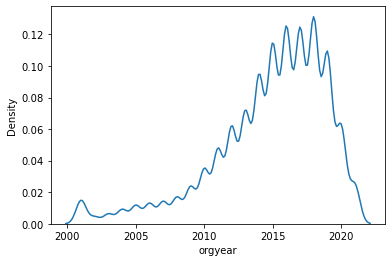

In [287]:
sns.kdeplot(x = df['orgyear'])

### removing less than 1% quantile and upper 99% quantile from the analysis

In [288]:
print(df['orgyear'].quantile(0.01))
print(df['orgyear'].quantile(0.99))

2001.0
2021.0


In [161]:
df['orgyear'] = df['orgyear'].clip(lower = df['orgyear'].quantile(0.01), upper = df['orgyear'].quantile(0.99))


In [162]:
df['ctc'].describe()

count    2.058170e+05
mean     2.271339e+06
std      1.179967e+07
min      2.000000e+00
25%      5.300000e+05
50%      9.500000e+05
75%      1.700000e+06
max      1.000150e+09
Name: ctc, dtype: float64

<AxesSubplot:xlabel='ctc', ylabel='Density'>

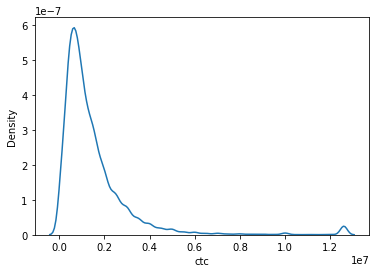

In [289]:
sns.kdeplot(x = df['ctc'])

In [163]:
df['ctc'] = df['ctc'].clip(lower = df['ctc'].quantile(0.01), upper = df['ctc'].quantile(0.99))


In [165]:
df['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto          8337
xzegojo                            5381
vbvkgz                             3481
zgn vuurxwvmrt vwwghzn             3411
wgszxkvzn                          3240
                                   ... 
hzxctqvxnvo uqxbv xzagztoxv           1
ontbqgmg ntwyzgrgsxto                 1
vvpvoy axsxnvr tantwy                 1
axvwqxntwy ntwyzgrgsxto ucn rna       1
vwwtznhqtmjlhontwyzgctqn              1
Name: company_hash, Length: 37246, dtype: int64

### grouping company_hash into "Others" where their frequency count is < 5

In [172]:
df.loc[df.groupby('company_hash')['ctc'].transform('count') < 5, 'company_hash'] = 'Others'


In [173]:
df['company_hash'].value_counts()

Others                       47850
nvnv wgzohrnvzwj otqcxwto     8337
xzegojo                       5381
vbvkgz                        3481
zgn vuurxwvmrt vwwghzn        3411
                             ...  
xzaxvz mvzp                      5
xzohqtabxzt                      5
ntwyvytva                        5
qxkkrt                           5
bgbouqtoog                       5
Name: company_hash, Length: 3782, dtype: int64

### new feature: years_of_experience

In [175]:
df['years_of_experience']=2023-df['orgyear']

In [176]:
df.drop_duplicates(inplace=True)
df.shape

(166819, 6)

In [177]:
df=df[~df['years_of_experience'].isnull()]

In [178]:
df.shape

(166819, 6)

In [181]:
df.isnull().sum()

company_hash           0
orgyear                0
ctc                    0
job_position           0
ctc_updated_year       0
years_of_experience    0
dtype: int64

In [182]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience
count,166819.000000,1.668190e+05,166819.000000,166819.000000
mean,2014.835858,1.514715e+06,2019.533476,8.164142
std,4.149867,1.685616e+06,1.375766,4.149867
min,2001.000000,3.800000e+04,2015.000000,2.000000
25%,2013.000000,6.000000e+05,2019.000000,5.000000
50%,2016.000000,1.030000e+06,2020.000000,7.000000
75%,2018.000000,1.800000e+06,2021.000000,10.000000
max,2021.000000,1.260000e+07,2021.000000,22.000000


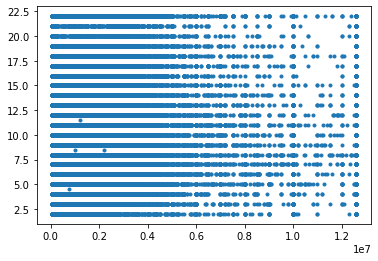

In [185]:
plt.plot(df['ctc'], df['years_of_experience'], '.')

---

## Manual Clustering 

### 1. based on - company, job position and years of experience

In [187]:
company_job_yoe_gpd = df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()
company_job_yoe_gpd


count  \
years_of_experience job_position              company_hash                        
2.0                 857628                    Others                        1.0   
                    91                        zgn vuurxwvmrt vwwghzn        1.0   
                    analyst programmer        Others                        1.0   
                    android engineer          Others                       19.0   
                                              bghznmrht ntwyzgrgsxto        1.0   
...                                                                         ...   
22.0                technical consulting      ytfrtnn uvwpvqa tzntquqxot    1.0   
                    technical program program vwr axsxnvr                   1.0   
                    technology architect      vwwtznhqt                     1.0   
                    trainer                   Others                        1.0   
                    zomato                    kgbvng                        1.0   

                                                                                  mean  \
years_of_experience job_position              company_hash                               
2.0                 857628                    Others                      4.500000e+05   
                    91                        zgn vuurxwvmrt vwwghzn      5.000000e+05   
                    analyst programmer        Others                      3.600000e+05   
                    android engineer          Others                      1.421579e+06   
                                              bghznmrht ntwyzgrgsxto      3.500000e+05   
...                                                                                ...   
22.0                technical consulting      ytfrtnn uvwpvqa tzntquqxot  2.500000e+06   
                    technical program program vwr axsxnvr                 2.300000e+06   
                    technology architect      vwwtznhqt                   4.200000e+06   
                    trainer                   Others                      4.000000e+05   
                    zomato                    kgbvng                      1.000000e+05   

                                                                                   std  \
years_of_experience job_position              company_hash                               
2.0                 857628                    Others                               NaN   
                    91                        zgn vuurxwvmrt vwwghzn               NaN   
                    analyst programmer        Others                               NaN   
                    android engineer          Others                      2.761065e+06   
                                              bghznmrht ntwyzgrgsxto               NaN   
...                                                                                ...   
22.0                technical consulting      ytfrtnn uvwpvqa tzntquqxot           NaN   
                    technical program program vwr axsxnvr                          NaN   
                    technology architect      vwwtznhqt                            NaN   
                    trainer                   Others                               NaN   
                    zomato                    kgbvng                               NaN   

                                                                                min  \
years_of_experience job_position              company_hash                            
2.0                 857628                    Others                       450000.0   
                    91                        zgn vuurxwvmrt vwwghzn       500000.0   
                    analyst programmer        Others                       360000.0   
                    android engineer          Others                       100000.0   
                                              bghznmrht ntwyzgrgsxto       350000.0   
...                                        

In [188]:
df_company_job_yoe=df.merge(company_job_yoe_gpd, on=['years_of_experience','job_position','company_hash'], how='left')
df_company_job_yoe


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,445.0,1.359734e+06,1.765297e+06,38000.0,380000.0,900000.0,1639999.0,12600000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166814,vuurt xzw,2008.0,220000,nan,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
166815,husqvawgb,2017.0,500000,nan,2020.0,6.0,4.0,1.202500e+06,4.719022e+05,500000.0,1145000.0,1405000.0,1462500.0,1500000.0
166816,vwwgrxnt,2021.0,700000,nan,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
166817,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0,4.0,124.0,1.750756e+06,2.605077e+06,38000.0,400000.0,745000.0,1800000.0,12600000.0


### Creating Designation basis on the ctc they are getting in their respective company

In [189]:
def create_segment(x,x_50,x_75):
    if x<x_50:
        return 3
    elif x>=x_50 and x<=x_75:
        return 2
    
    elif x>=x_75:
        return 1

In [193]:
df_company_job_yoe['designation'] =df_company_job_yoe.apply(lambda x: create_segment(x['ctc'],x['50%'],x['75%']),axis=1)


In [194]:
df_company_job_yoe.head(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,445.0,1.359734e+06,1.765297e+06,38000.0,380000.0,900000.0,1639999.0,12600000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2


In [196]:
df_company_job_yoe['designation'].value_counts(normalize=True)

2    0.452652
3    0.334111
1    0.213237
Name: designation, dtype: float64

In [205]:
df_company_job_yoe.groupby('designation',as_index=False)['ctc','years_of_experience'].describe()

ctc                                                             \
     count          mean           std      min        25%        50%   
0  35572.0  2.612364e+06  2.476233e+06  41000.0  1190000.0  1830000.0   
1  75511.0  1.519230e+06  1.452979e+06  38000.0   700000.0  1150000.0   
2  55736.0  8.080536e+05  6.798828e+05  38000.0   374750.0   600000.0   

                         years_of_experience                                \
         75%         max               count      mean       std  min  25%   
0  3000000.0  12600000.0             35572.0  7.874396  3.933626  2.0  5.0   
1  1839999.0  12600000.0             75511.0  8.575307  4.390693  2.0  5.0   
2  1050000.0  11200000.0             55736.0  7.792020  3.889727  2.0  5.0   

                    
   50%   75%   max  
0  7.0  10.0  22.0  
1  8.0  11.0  22.0  
2  7.0  10.0  22.0

### 2. based on - company &  job position 

In [206]:
company_job_gpd = df.groupby(['job_position','company_hash'])['ctc'].describe()
company_job_gpd

,,count,mean,std,min,25%,50%,75%,max
job_position,company_hash,,,,,,,,
.,Others,1.0,700000.0,NaN,700000.0,700000.0,700000.0,700000.0,700000.0
..,otre tburgjta,1.0,600000.0,NaN,600000.0,600000.0,600000.0,600000.0,600000.0
.7,wgszxkvzn,1.0,470000.0,NaN,470000.0,470000.0,470000.0,470000.0,470000.0
7,Others,1.0,420000.0,NaN,420000.0,420000.0,420000.0,420000.0,420000.0
7033771951,yaew mvzp,1.0,12600000.0,NaN,12600000.0,12600000.0,12600000.0,12600000.0,12600000.0
...,...,...,...,...,...,...,...,...,...
wordpress developer,Others,1.0,600000.0,NaN,600000.0,600000.0,600000.0,600000.0,600000.0
worker,zgn vuurxwvmrt vwwghzn,1.0,200000.0,NaN,200000.0,200000.0,200000.0,200000.0,200000.0
x,Others,1.0,400000.0,NaN,400000.0,400000.0,400000.0,400000.0,400000.0


In [207]:
df_company_job = df.merge(company_job_gpd, on=['job_position','company_hash'], how='left')
df_company_job


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,4020.0,1.481568e+06,1.981495e+06,38000.0,360000.0,950000.0,1780000.0,12600000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,25.0,1.500000e+06,6.772124e+05,520000.0,1050000.0,1540000.0,1800000.0,3500000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166814,vuurt xzw,2008.0,220000,nan,2019.0,15.0,17.0,1.681941e+06,1.281569e+06,60000.0,220000.0,2300000.0,2700000.0,3500000.0
166815,husqvawgb,2017.0,500000,nan,2020.0,6.0,13.0,1.000769e+06,3.300369e+05,500000.0,750000.0,1000000.0,1200000.0,1500000.0
166816,vwwgrxnt,2021.0,700000,nan,2021.0,2.0,38.0,1.350342e+06,8.419418e+05,300000.0,812500.0,1175000.0,1495000.0,4800000.0
166817,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0,4.0,624.0,1.680924e+06,2.585817e+06,38000.0,360000.0,800000.0,1800000.0,12600000.0


### Creating "class" basis on the salary they are getting in their respective company


In [209]:
df_company_job['classs'] = df_company_job.apply(lambda x: create_segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_company_job.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,classs
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2.0,1085000.00,21213.203436,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,25.0,988199.96,487499.789590,300000.0,600000.0,850000.0,1380000.0,2000000.0,3


In [210]:
df_company_job.classs.value_counts(normalize=True)

3    0.435430
2    0.319958
1    0.244612
Name: classs, dtype: float64

In [211]:
df_company_job.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience', 'count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max', 'classs'],
      dtype='object')

In [214]:
df_company_job.drop(columns=['count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max'], inplace=True)

In [212]:
df_company_job_yoe.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience', 'count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max', 'designation'],
      dtype='object')

In [215]:
df_company_job_yoe.drop(columns=['count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max'], inplace=True)

In [216]:
df_company_job_yoe_Merged=df_company_job.merge(df_company_job_yoe, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')


In [217]:
df_company_job_yoe_Merged.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1,2


### 3. based on - company 

In [218]:
company_gpd = df.groupby(['company_hash'])['ctc'].describe()
df_company = df.merge(company_gpd, on=['company_hash'], how='left')

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,411.0,1.326951e+06,1.474961e+06,38000.0,600000.0,900000.0,1700000.0,12600000.0


In [219]:
df_company.head(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,411.0,1.326951e+06,1.474961e+06,38000.0,600000.0,900000.0,1700000.0,12600000.0
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,26657.0,1.427324e+06,1.910239e+06,38000.0,420000.0,880000.0,1650000.0,12600000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,67.0,1.729478e+06,9.861481e+05,200000.0,1100000.0,1400000.0,2100000.0,4700000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0


### Creating Tier basis on the salary in the companies

In [221]:
df_company['tier'] =df_company.apply(lambda x: create_segment(x['ctc'],x['50%'],x['75%']),axis=1)



In [222]:
df_company.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,411.0,1.326951e+06,1.474961e+06,38000.0,600000.0,900000.0,1700000.0,12600000.0,3


In [224]:
df_company['tier'].value_counts(normalize=True)

3    0.476858
2    0.283037
1    0.240105
Name: tier, dtype: float64

In [225]:
df_company.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_company.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1


In [226]:
df_company_job_yoe_Merged_company=df_company_job_yoe_Merged.merge(df_company, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')


In [227]:
df_company_job_yoe_Merged_company.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1,2,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1,2,1
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,2018.0,700000,fullstack engineer,2020.0,5.0,2,2,2
6,lubgqsvz wyvotwg,2018.0,1500000,fullstack engineer,2019.0,5.0,3,3,3
7,vwwtznhqt ntwyzgrgsj,2019.0,400000,backend engineer,2019.0,4.0,3,3,3
8,utqoxontzn ojontbo,2020.0,450000,nan,2019.0,3.0,3,2,3
9,Others,2019.0,360000,nan,2019.0,4.0,3,3,3


### -------------------------------------------------
### Features for Hierarchical and k-means clustering



In [266]:
X = df_company_job_yoe_Merged_company[['ctc', 'years_of_experience','orgyear' ,'classs', 'designation', 'tier']].copy()


In [267]:
X.columns

Index(['ctc', 'years_of_experience', 'orgyear', 'classs', 'designation',
       'tier'],
      dtype='object')

In [270]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [271]:
X_scaled.head()

,ctc,years_of_experience,orgyear,classs,designation,tier
0,-0.246033,-0.280526,0.280526,-1.484317,-0.165605,-0.291223
1,-0.631650,-0.762470,0.762470,1.008621,1.204467,0.938844
2,0.287898,-0.039554,0.039554,-1.484317,-1.535678,-1.521290
3,-0.483335,-0.521498,0.521498,1.008621,1.204467,0.938844
4,-0.068056,-0.521498,0.521498,-1.484317,-0.165605,-1.521290


In [272]:
X_scaled.shape

(166819, 6)

### 1. Heirarchical clustering

Text(17.200000000000017, 0.5, 'distance')

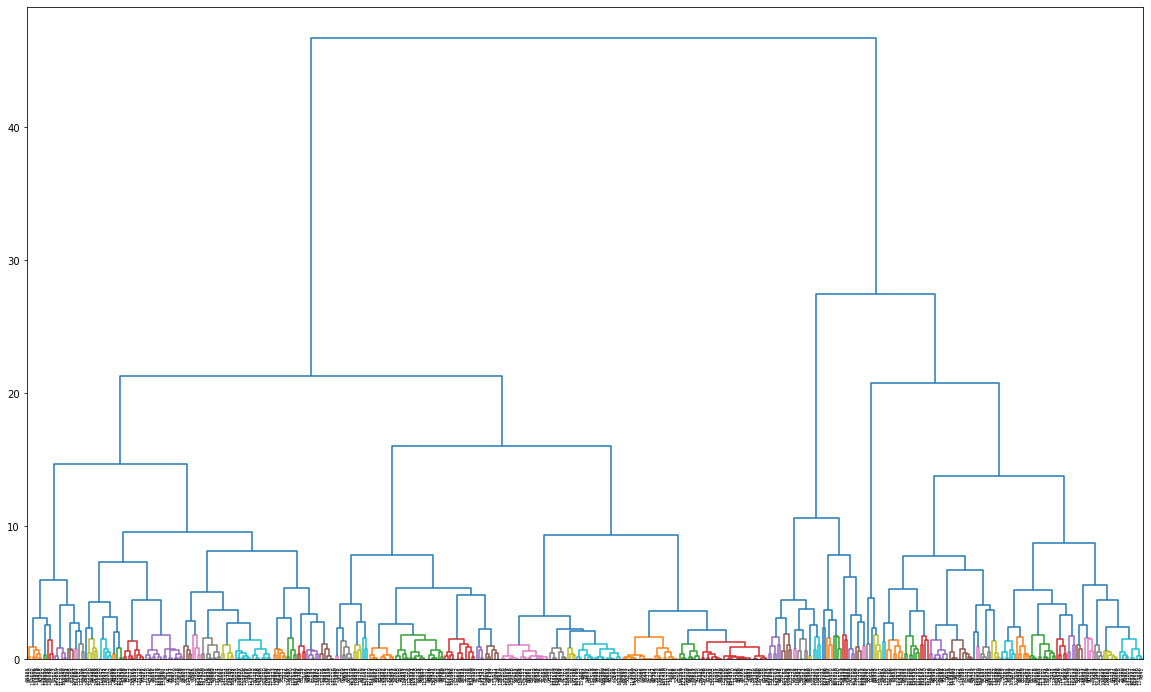

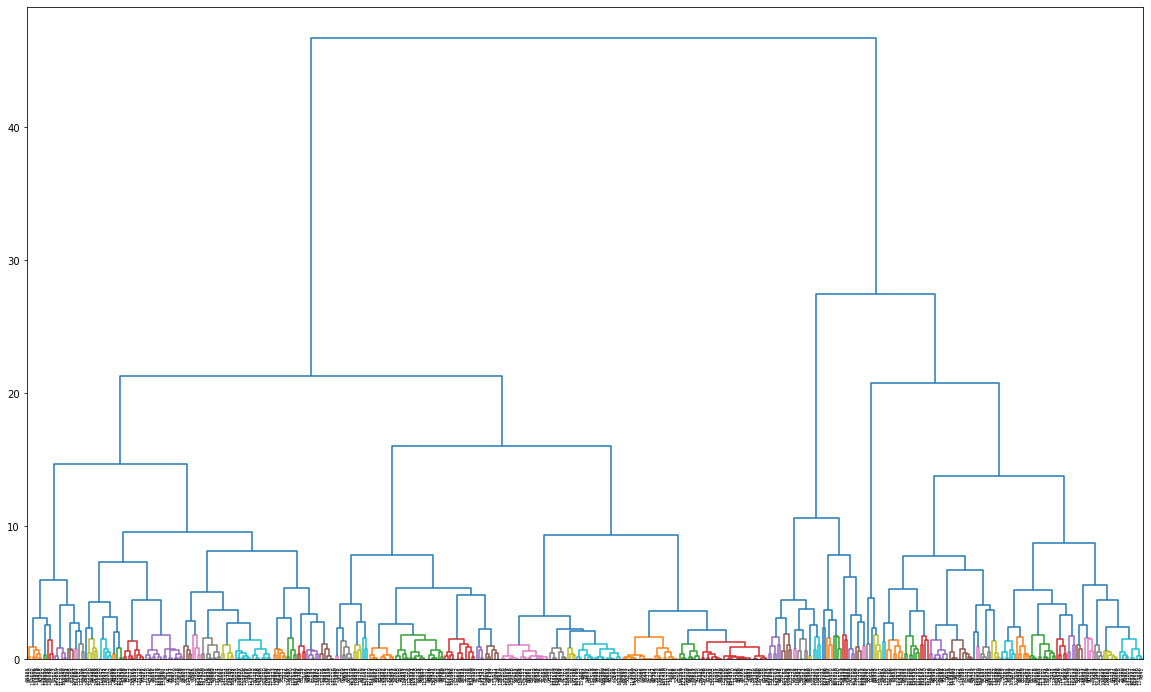

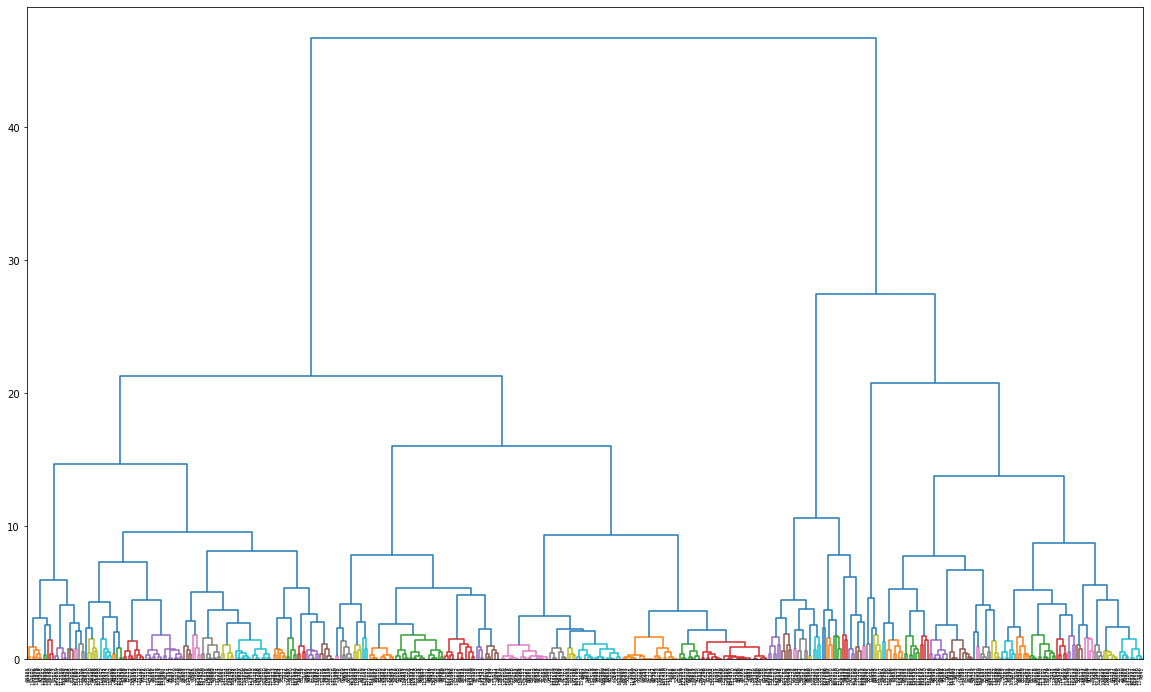

In [273]:
import scipy.cluster.hierarchy as h_cluster

sample = X_scaled.sample(500)
Z = h_cluster.linkage(sample, method='ward')

fig, ax1 = plt.subplots(figsize=(20, 12))
h_cluster.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

fig, ax2 = plt.subplots(figsize=(20, 12))
h_cluster.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

fig, ax3 = plt.subplots(figsize=(20, 12))
h_cluster.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

### 2. KMeans clustering

In [241]:
from sklearn.cluster import KMeans

In [274]:
for i in range(1,10):
    k = 4
    kM = KMeans(n_clusters=k, random_state=654)
    y_pred = kM.fit_predict(X_scaled)

In [275]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled) 
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[1000913.9999999992,
 635408.6037898303,
 491220.8529038671,
 410367.8870669769,
 355402.1403569616,
 308834.86913137423,
 280641.6764488734,
 254563.0494184827,
 236446.00811402913]

In [276]:
kmeans_per_k

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

### elbow plot to get number of clusters

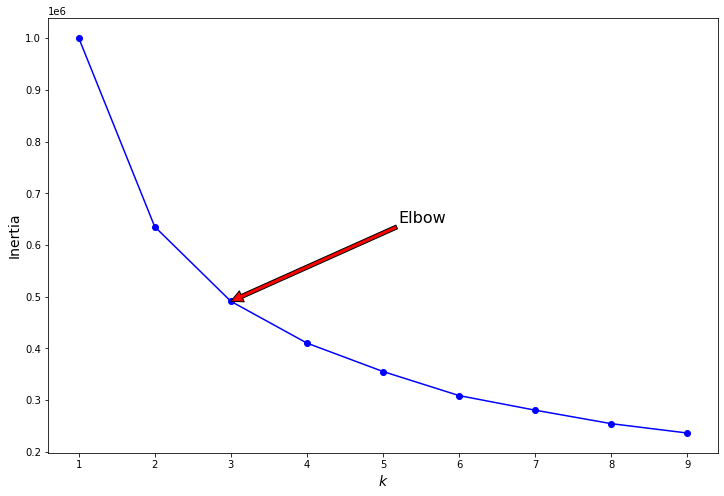

In [277]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
 xy=(3, inertias[2]),
 xytext=(0.55, 0.55),
 textcoords='figure fraction',
 fontsize=16,
 arrowprops=dict(facecolor='red', shrink=0.0001)
 )
plt.show()

### k means with n=3

In [278]:
k = 3
kM = KMeans(n_clusters=k,random_state=654)
y_pred = kM.fit_predict(X_scaled)

In [279]:
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [280]:
clusters.sample(10)

,ctc,years_of_experience,orgyear,classs,designation,tier,label
110086,900000,11.0,2012.0,3,2,3,2
127872,3200000,7.0,2016.0,2,2,2,1
64391,900000,6.0,2017.0,2,2,2,1
133944,819999,10.0,2013.0,2,2,2,1
42010,1350000,4.0,2019.0,1,2,3,1
146031,2740000,10.0,2013.0,2,1,2,1
41966,260000,9.0,2014.0,3,3,3,2
25019,1800000,3.0,2020.0,1,1,1,1
54519,600000,8.0,2015.0,3,3,3,2
119104,1400000,10.0,2013.0,2,2,3,2


In [281]:
clusters.shape

(166819, 7)

In [282]:
clusters.dtypes

ctc                      int64
years_of_experience    float64
orgyear                float64
classs                   int64
designation              int64
tier                     int64
label                    int32
dtype: object

<AxesSubplot:xlabel='years_of_experience', ylabel='ctc'>

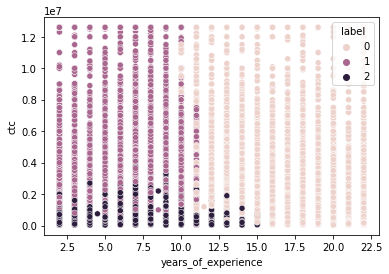

In [283]:
sns.scatterplot(x = clusters['years_of_experience'], y = clusters['ctc'], hue = clusters['label'],
               )

<AxesSubplot:xlabel='years_of_experience'>

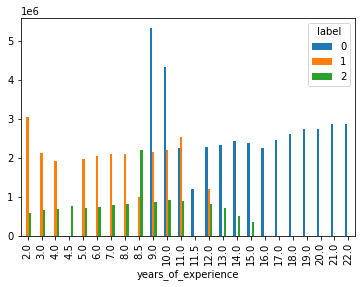

In [284]:
pd.crosstab(columns = clusters["label"],
 index = clusters["years_of_experience"],
 values=clusters["ctc"],aggfunc= np.mean
 ).plot(kind = "bar")

### 1. Cluster1 : label 2 -> defined as year of experience < 15years and CTC <10L
### 2. Cluster2: label 1 -> defined as year of experience < 12 years and CTC < 20L (higher CTC comapred to cluster 1)
### 3. Cluster3: label 0 -> defined as year of expereince > 9 years and < 22 years, and higher CTC of 20-25L


### The three clusters are summarised as:

In [293]:
clusters.groupby("label").describe()[["ctc","classs","tier","years_of_experience"]].T


label                                 0             1             2
ctc                 count  3.020900e+04  5.512400e+04  8.148600e+04
                    mean   2.446509e+06  2.118561e+06  7.607826e+05
                    std    1.985710e+06  2.083855e+06  5.295868e+05
                    min    3.800000e+04  3.800000e+04  3.800000e+04
                    25%    1.300000e+06  1.000000e+06  4.000000e+05
                    50%    2.000000e+06  1.500000e+06  6.300000e+05
                    75%    3.000000e+06  2.400000e+06  1.000000e+06
                    max    1.260000e+07  1.260000e+07  7.000000e+06
classs              count  3.020900e+04  5.512400e+04  8.148600e+04
                    mean   1.661061e+00  1.533706e+00  2.831738e+00
                    std    7.054805e-01  5.244312e-01  3.743962e-01
                    min    1.000000e+00  1.000000e+00  1.000000e+00
                    25%    1.000000e+00  1.000000e+00  3.000000e+00
                    50%    2.000000e+00  2.000000e+00  3.000000e+00
                    75%    2.000000e+00  2.000000e+00  3.000000e+00
                    max    3.000000e+00  3.000000e+00  3.000000e+00
tier                count  3.020900e+04  5.512400e+04  8.148600e+04
                    mean   1.543414e+00  1.633372e+00  2.901971e+00
                    std    6.751420e-01  5.796100e-01  2.996171e-01
                    min    1.000000e+00  1.000000e+00  1.000000e+00
                    25%    1.000000e+00  1.000000e+00  3.000000e+00
                    50%    1.000000e+00  2.000000e+00  3.000000e+00
                    75%    2.000000e+00  2.000000e+00  3.000000e+00
                    max    3.000000e+00  3.000000e+00  3.000000e+00
years_of_experience count  3.020900e+04  5.512400e+04  8.148600e+04
                    mean   1.490882e+01  6.704058e+00  6.651437e+00
                    std    3.387825e+00  2.306792e+00  2.608863e+00
                    min    9.000000e+00  2.000000e+00  2.000000e+00
                    25%    1.200000e+01  5.000000e+00  5.000000e+00
                    50%    1.400000e+01  7.000000e+00  6.000000e+00
                    75%    1.700000e+01  9.000000e+00  8.000000e+00
                    max    2.200000e+01  1.200000e+01  1.500000e+01